# Strategic and Financial Performance Analysis
## Burger King vs McDonald's (2021–2023)

**Part 1: Data Cleaning, Transformation and Exploration**

This notebook loads, cleans, and explores the `mcd.csv` and `bk.csv` datasets, then defines and answers **15 data-driven business questions** comparing both companies.

---

## 1. Library Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Plot styling
plt.rcParams.update({
    'figure.dpi': 120,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3,
})
MCD_COLOR = '#DA291C'   # McDonald's red
BK_COLOR  = '#FF8C00'   # Burger King orange
YEARS = [2021, 2022, 2023]
print('Libraries loaded.')

Libraries loaded.


## 2. Load the Datasets

In [5]:
mcd_raw = pd.read_csv('/content/mcd.csv', encoding='utf-8-sig')
bk_raw  = pd.read_csv('/content/bk.csv',  encoding='utf-8-sig')

print('=== McDonald\'s raw ===')
print(mcd_raw.shape)
print(mcd_raw.head())
print('\n=== Burger King raw ===')
print(bk_raw.shape)
print(bk_raw.head())

=== McDonald's raw ===
(207, 5)
  table_name                 heading  \
0    revenue  company_operated_sales   
1    revenue  company_operated_sales   
2    revenue  company_operated_sales   
3    revenue  company_operated_sales   
4    revenue  company_operated_sales   

                                              item        Date   Value  
0                              company_operated_us  12/31/2023  3221.0  
1                              company_operated_us  12/31/2022  2836.0  
2                              company_operated_us  12/31/2021  2617.0  
3  company_operated_international_operated_markets  12/31/2023  5702.0  
4  company_operated_international_operated_markets  12/31/2022  5179.0  

=== Burger King raw ===
(57, 4)
                               item  Attribute    Value global_us_usc
0           system_wide_sales_total       2023  27019.0        global
1           system_wide_sales_total       2022  23450.0        global
2           system_wide_sales_total       2021

## 3. Data Cleaning

Steps performed:
- Strip BOM characters and whitespace from column names
- Standardise column names to snake_case
- Parse dates and extract Year for McDonald's
- Confirm data types and check for missing/duplicate values
- Rename columns for clarity

In [6]:
# ── McDonald's cleaning ──────────────────────────────────
mcd = mcd_raw.copy()
mcd.columns = mcd.columns.str.strip().str.lower().str.replace(' ', '_')
mcd['date'] = pd.to_datetime(mcd['date'], format='%m/%d/%Y')
mcd['year'] = mcd['date'].dt.year
mcd['value'] = pd.to_numeric(mcd['value'], errors='coerce')

# ── Burger King cleaning ─────────────────────────────────────
bk = bk_raw.copy()
bk.columns = bk.columns.str.strip().str.lower().str.replace(' ', '_')
bk.rename(columns={'attribute': 'year', 'global_us_usc': 'region'}, inplace=True)
bk['year']  = pd.to_numeric(bk['year'],  errors='coerce')
bk['value'] = pd.to_numeric(bk['value'], errors='coerce')

print('=== McDonald\'s cleaned ===')
print(mcd.dtypes)
print(f'Null values: {mcd.isnull().sum().sum()}')
print(f'Duplicate rows: {mcd.duplicated().sum()}')

print('\n=== Burger King cleaned ===')
print(bk.dtypes)
print(f'Null values: {bk.isnull().sum().sum()}')
print(f'Duplicate rows: {bk.duplicated().sum()}')

=== McDonald's cleaned ===
table_name            object
heading               object
item                  object
date          datetime64[ns]
value                float64
year                   int32
dtype: object
Null values: 0
Duplicate rows: 0

=== Burger King cleaned ===
item       object
year        int64
value     float64
region     object
dtype: object
Null values: 0
Duplicate rows: 0


In [7]:
# Final cleaned preview
print('McDonald\'s (first 5):')
display(mcd.head())
print('\nBurger King (all rows):')
display(bk)

McDonald's (first 5):


,table_name,heading,item,date,value,year
0,revenue,company_operated_sales,company_operated_us,2023-12-31,3221.0,2023
1,revenue,company_operated_sales,company_operated_us,2022-12-31,2836.0,2022
2,revenue,company_operated_sales,company_operated_us,2021-12-31,2617.0,2021
3,revenue,company_operated_sales,company_operated_international_operated_markets,2023-12-31,5702.0,2023
4,revenue,company_operated_sales,company_operated_international_operated_markets,2022-12-31,5179.0,2022



Burger King (all rows):


,item,year,value,region
0,system_wide_sales_total,2023,27019.0,global
1,system_wide_sales_total,2022,23450.0,global
2,system_wide_sales_total,2021,21690.0,global
3,system_wide_sales_growth_percent,2023,6.9,global
4,system_wide_sales_growth_percent,2022,2.8,global
5,system_wide_sales_growth_percent,2021,4.2,global
6,comparable_sales_growth_global,2023,7.4,us
7,comparable_sales_growth_global,2022,2.3,us
8,comparable_sales_growth_global,2021,4.8,us
9,net_restaurant_growth_global,2023,-3.3,us


## 4. Helper Functions – Extract Key Metrics

In [8]:
def mcd_val(item_name, year):
    """Return McD value for a given item and year."""
    row = mcd[(mcd['item'] == item_name) & (mcd['year'] == year)]
    return row['value'].values[0] if len(row) else np.nan

def bk_val(item_name, year):
    """Return BK value for a given item and year."""
    row = bk[(bk['item'] == item_name) & (bk['year'] == year)]
    return row['value'].values[0] if len(row) else np.nan

# Quick sanity checks
print('MCD Total Revenue 2023:', mcd_val('total_revenue', 2023))
print('BK System-Wide Sales 2023:', bk_val('system_wide_sales_total', 2023))

MCD Total Revenue 2023: 25494.0
BK System-Wide Sales 2023: 27019.0


## 5. Data Exploration – Unique Tables and Items

In [9]:
print('=== McDonald\'s table_name categories ===')
print(mcd['table_name'].value_counts())

print('\n=== McDonald\'s unique items (sample 20) ===')
print(mcd['item'].unique()[:20])

print('\n=== Burger King unique items ===')
print(bk['item'].unique())

=== McDonald's table_name categories ===
table_name
income_statement                   63
operating_non_operating_results    48
liabilities                        39
revenue                            24
assets                             21
store_count                         6
capital_expenditures                6
Name: count, dtype: int64

=== McDonald's unique items (sample 20) ===
['company_operated_us' 'company_operated_international_operated_markets'
 'company_operated_intl_dev_licensed_corp' 'franchised_us'
 'franchised_international_operated_markets'
 'franchised_intl_dev_licensed_corp' 'other_revenues' 'total_revenue'
 'sales_by_company_operated_restaurants'
 'revenues_from_franchised_restaurants'
 'company_operated_restaurant_expenses'
 'franchised_restaurants_occupancy_expenses' 'other_restaurant_expenses'
 'depreciation_and_amortization' 'other'
 'other_operating_income_expense_net' 'operating_income'
 'interest_expense' 'non_operating_income' 'provision_for_income_taxes']

## 6. Build Comparison Master Table

We extract the most important comparable metrics from both datasets into a unified summary table.

In [10]:
records = []
for yr in YEARS:
    # Revenue
    mcd_rev   = mcd_val('total_revenue', yr)
    bk_rev    = bk_val('revenue_global', yr)
    # Operating Income
    mcd_oi    = mcd_val('operating_income', yr)
    bk_oi     = bk_val('operating_income_global', yr)
    # Net Income (MCD only)
    mcd_ni    = mcd_val('net_income', yr)
    # System-Wide Sales
    mcd_sws   = mcd_rev   # MCD uses total revenue as proxy
    bk_sws    = bk_val('system_wide_sales_total', yr)
    # Store count global
    mcd_stores = mcd_val('global', yr)   # from store_count table
    bk_stores  = bk_val('store_count_global', yr)
    # US store count
    mcd_us_stores = mcd_val('us', yr)
    bk_us_stores  = bk_val('store_count_us', yr)
    # Capex global
    mcd_capex  = mcd_val('global', yr) if False else None
    bk_capex   = bk_val('capex_us_canada', yr)
    # Franchise revenue MCD
    mcd_fran   = mcd_val('revenues_from_franchised_restaurants', yr)
    bk_fran    = bk_val('revenue_franchise', yr)
    # Depreciation
    mcd_dep    = mcd_val('depreciation_and_amortization', yr)
    bk_dep     = bk_val('depreciation_us_canada', yr)
    # EPS Diluted
    mcd_eps    = mcd_val('earnings_per_share_diluted', yr)
    # Dividends per share
    mcd_div    = mcd_val('dividends_declared_per_share', yr)

    records.append({
        'year': yr,
        'mcd_total_revenue_m':  mcd_rev,
        'bk_total_revenue_m':   bk_rev,
        'mcd_system_wide_sales_m': mcd_rev,
        'bk_system_wide_sales_m':  bk_sws,
        'mcd_operating_income_m':  mcd_oi,
        'bk_operating_income_m':   bk_oi,
        'mcd_net_income_m':        mcd_ni,
        'mcd_stores_global':       mcd_stores,
        'bk_stores_global':        bk_stores,
        'mcd_stores_us':           mcd_us_stores,
        'bk_stores_us':            bk_us_stores,
        'mcd_franchise_revenue_m': mcd_fran,
        'bk_franchise_revenue_m':  bk_fran,
        'mcd_depreciation_m':      mcd_dep,
        'bk_depreciation_usc_m':   bk_dep,
        'mcd_eps_diluted':         mcd_eps,
        'mcd_dividends_per_share': mcd_div,
    })

comp = pd.DataFrame(records)
print('Comparison master table:')
display(comp)

Comparison master table:


,year,mcd_total_revenue_m,bk_total_revenue_m,mcd_system_wide_sales_m,bk_system_wide_sales_m,mcd_operating_income_m,bk_operating_income_m,mcd_net_income_m,mcd_stores_global,bk_stores_global,mcd_stores_us,bk_stores_us,mcd_franchise_revenue_m,bk_franchise_revenue_m,mcd_depreciation_m,bk_depreciation_usc_m,mcd_eps_diluted,mcd_dividends_per_share
0,2021,23224.0,1553.0,23224.0,21690.0,10356.0,932.0,7544.7,40031.0,18625.0,13438.0,7105.0,13085.0,1130.0,312.0,44.0,10.04,5.25
1,2022,23183.0,1688.0,23183.0,23450.0,9371.0,921.0,6177.4,40275.0,19035.0,13444.0,6778.0,14106.0,1171.0,312.0,45.0,8.33,5.66
2,2023,25494.0,1837.0,25494.0,27019.0,11647.0,983.0,8468.8,41822.0,19384.0,13457.0,6643.0,15436.0,1216.0,382.0,46.0,11.56,6.23


---
## 7. Business Questions & Analysis

The following 15 business questions were derived from exploring the data structure and identifying meaningful comparative metrics between McDonald's and Burger King.

---

### Q1. How does total revenue compare between McDonald's and Burger King across 2021–2023?
**Rationale:** Revenue is the headline metric for financial scale. Given that both companies operate globally but at very different sizes, this sets the context for all other comparisons.

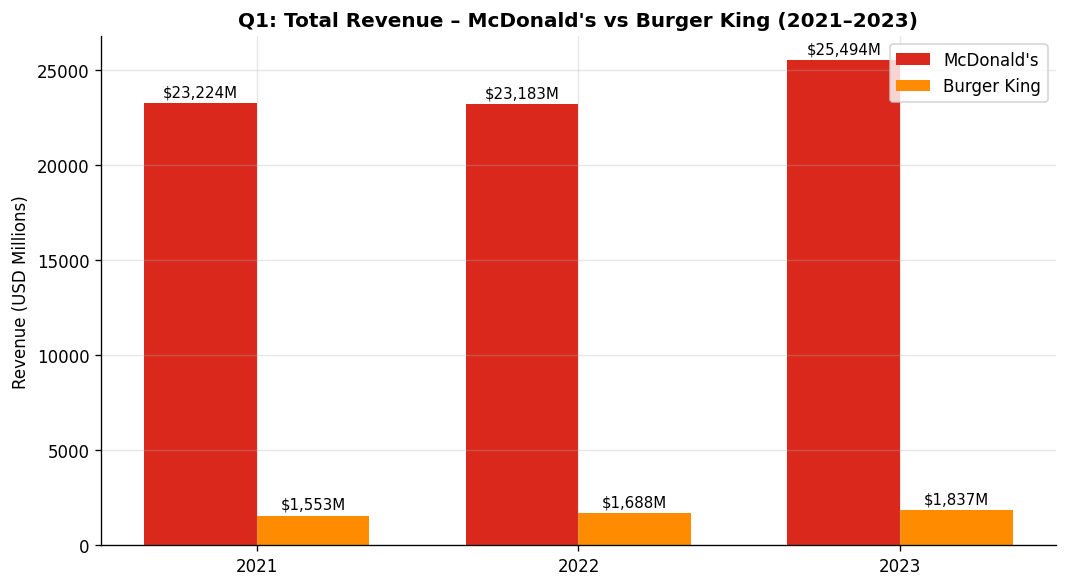

Revenue Ratio (MCD / BK):
  2021: MCD is 15.0x larger than BK by revenue
  2022: MCD is 13.7x larger than BK by revenue
  2023: MCD is 13.9x larger than BK by revenue


In [11]:
fig, ax = plt.subplots(figsize=(9, 5))
x = np.arange(len(YEARS))
w = 0.35
bars1 = ax.bar(x - w/2, comp['mcd_total_revenue_m'], w, label="McDonald's", color=MCD_COLOR)
bars2 = ax.bar(x + w/2, comp['bk_total_revenue_m'],  w, label='Burger King', color=BK_COLOR)
ax.set_xticks(x); ax.set_xticklabels(YEARS)
ax.set_ylabel('Revenue (USD Millions)')
ax.set_title("Q1: Total Revenue – McDonald's vs Burger King (2021–2023)", fontweight='bold')
ax.legend()
for bar in bars1: ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+200, f'${bar.get_height():,.0f}M', ha='center', va='bottom', fontsize=9)
for bar in bars2: ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+200, f'${bar.get_height():,.0f}M', ha='center', va='bottom', fontsize=9)
plt.tight_layout(); plt.show()

print('Revenue Ratio (MCD / BK):')
for _, row in comp.iterrows():
    ratio = row['mcd_total_revenue_m'] / row['bk_total_revenue_m']
    print(f"  {int(row['year'])}: MCD is {ratio:.1f}x larger than BK by revenue")

### Q2. What is the Year-over-Year revenue growth rate for each company?
**Rationale:** Growth rate normalises the size gap and shows which company is accelerating faster.

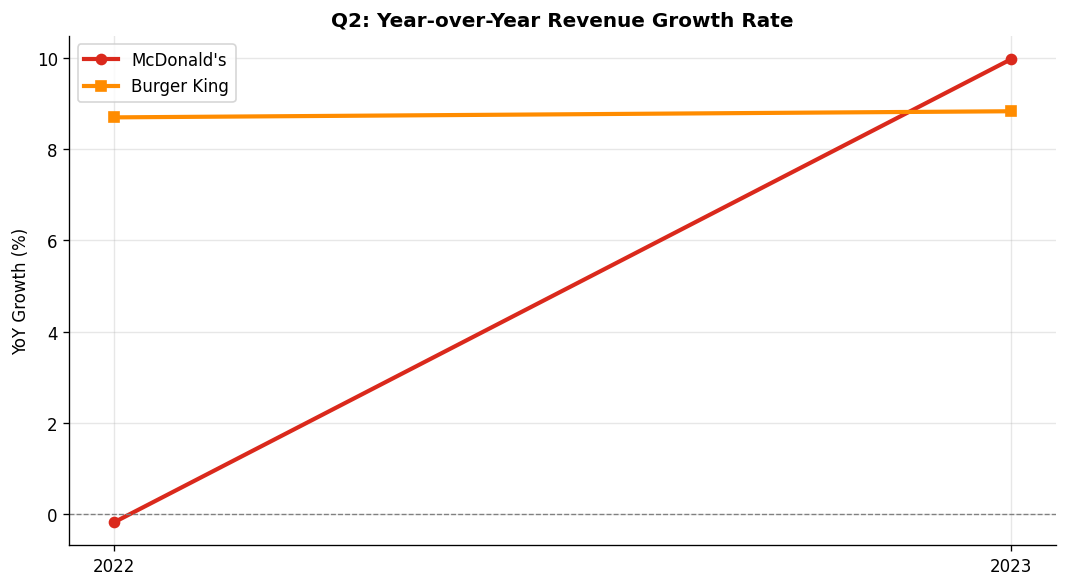

 year  mcd_rev_growth_%  bk_rev_growth_%
 2022         -0.176542         8.692853
 2023          9.968511         8.827014


In [12]:
comp['mcd_rev_growth_%'] = comp['mcd_total_revenue_m'].pct_change() * 100
comp['bk_rev_growth_%']  = comp['bk_total_revenue_m'].pct_change() * 100

fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(YEARS[1:], comp['mcd_rev_growth_%'].dropna(), marker='o', color=MCD_COLOR, linewidth=2.5, label="McDonald's")
ax.plot(YEARS[1:], comp['bk_rev_growth_%'].dropna(),  marker='s', color=BK_COLOR,  linewidth=2.5, label='Burger King')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.set_xticks(YEARS[1:]); ax.set_ylabel('YoY Growth (%)')
ax.set_title('Q2: Year-over-Year Revenue Growth Rate', fontweight='bold')
ax.legend(); plt.tight_layout(); plt.show()

print(comp[['year', 'mcd_rev_growth_%', 'bk_rev_growth_%']].dropna().to_string(index=False))

### Q3. How does Operating Income compare, and what is each company's Operating Margin?
**Rationale:** Operating margin reveals how efficiently each company converts revenue into profit.

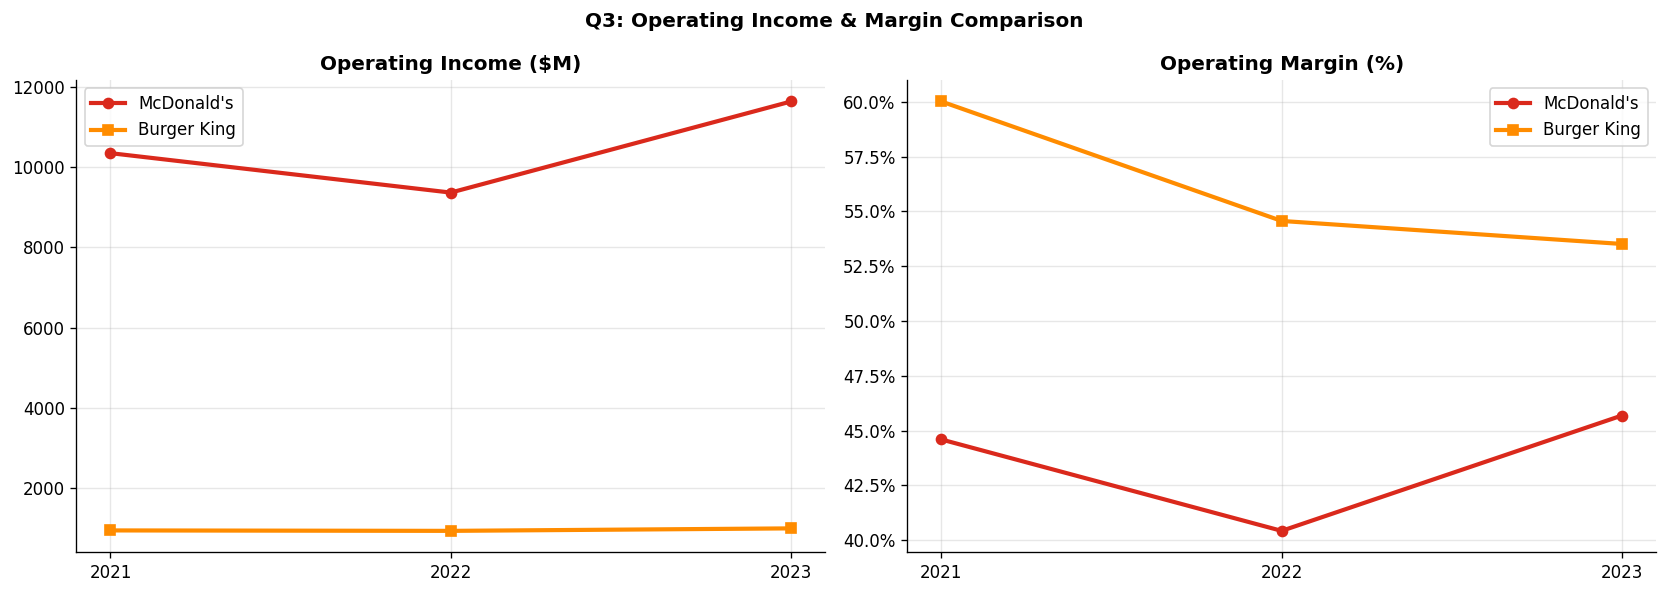

 year  mcd_operating_income_m  bk_operating_income_m  mcd_op_margin_%  bk_op_margin_%
 2021                 10356.0                  932.0        44.591802       60.012878
 2022                  9371.0                  921.0        40.421861       54.561611
 2023                 11647.0                  983.0        45.685259       53.511159


In [13]:
comp['mcd_op_margin_%'] = comp['mcd_operating_income_m'] / comp['mcd_total_revenue_m'] * 100
comp['bk_op_margin_%']  = comp['bk_operating_income_m']  / comp['bk_total_revenue_m']  * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Operating Income
axes[0].plot(YEARS, comp['mcd_operating_income_m'], marker='o', color=MCD_COLOR, linewidth=2.5, label="McDonald's")
axes[0].plot(YEARS, comp['bk_operating_income_m'],  marker='s', color=BK_COLOR,  linewidth=2.5, label='Burger King')
axes[0].set_title('Operating Income ($M)', fontweight='bold')
axes[0].set_xticks(YEARS); axes[0].legend()

# Operating Margin
axes[1].plot(YEARS, comp['mcd_op_margin_%'], marker='o', color=MCD_COLOR, linewidth=2.5, label="McDonald's")
axes[1].plot(YEARS, comp['bk_op_margin_%'],  marker='s', color=BK_COLOR,  linewidth=2.5, label='Burger King')
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].set_title('Operating Margin (%)', fontweight='bold')
axes[1].set_xticks(YEARS); axes[1].legend()

plt.suptitle('Q3: Operating Income & Margin Comparison', fontweight='bold')
plt.tight_layout(); plt.show()

print(comp[['year','mcd_operating_income_m','bk_operating_income_m','mcd_op_margin_%','bk_op_margin_%']].to_string(index=False))

### Q4. How do global store counts compare and which company is growing its footprint faster?
**Rationale:** Store count is a proxy for brand reach and market penetration.

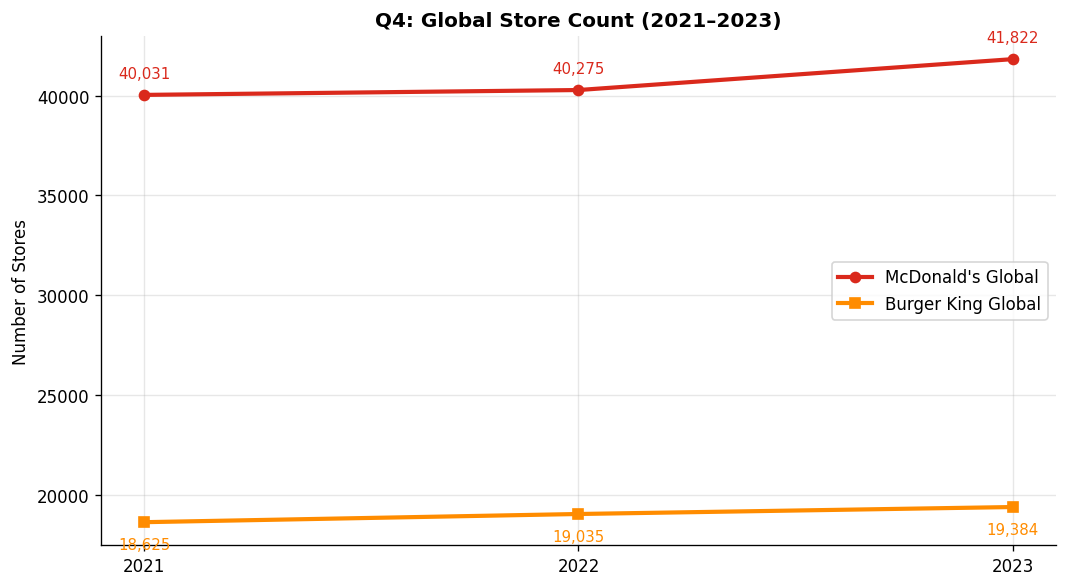

 year  mcd_stores_global  bk_stores_global  mcd_store_growth_%  bk_store_growth_%
 2021            40031.0           18625.0                 NaN                NaN
 2022            40275.0           19035.0            0.609528           2.201342
 2023            41822.0           19384.0            3.841092           1.833465


In [14]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(YEARS, comp['mcd_stores_global'], marker='o', color=MCD_COLOR, linewidth=2.5, label="McDonald's Global")
ax.plot(YEARS, comp['bk_stores_global'],  marker='s', color=BK_COLOR,  linewidth=2.5, label='Burger King Global')
for yr, mval, bval in zip(YEARS, comp['mcd_stores_global'], comp['bk_stores_global']):
    ax.annotate(f'{int(mval):,}', (yr, mval), textcoords='offset points', xytext=(0, 10), ha='center', color=MCD_COLOR, fontsize=9)
    ax.annotate(f'{int(bval):,}', (yr, bval), textcoords='offset points', xytext=(0, -16), ha='center', color=BK_COLOR, fontsize=9)
ax.set_ylabel('Number of Stores')
ax.set_title('Q4: Global Store Count (2021–2023)', fontweight='bold')
ax.set_xticks(YEARS); ax.legend(); plt.tight_layout(); plt.show()

comp['mcd_store_growth_%'] = comp['mcd_stores_global'].pct_change() * 100
comp['bk_store_growth_%']  = comp['bk_stores_global'].pct_change()  * 100
print(comp[['year','mcd_stores_global','bk_stores_global','mcd_store_growth_%','bk_store_growth_%']].to_string(index=False))

### Q5. What is the Revenue per Store for each company globally?
**Rationale:** Revenue per store is a key efficiency metric indicating how productively each location generates income.

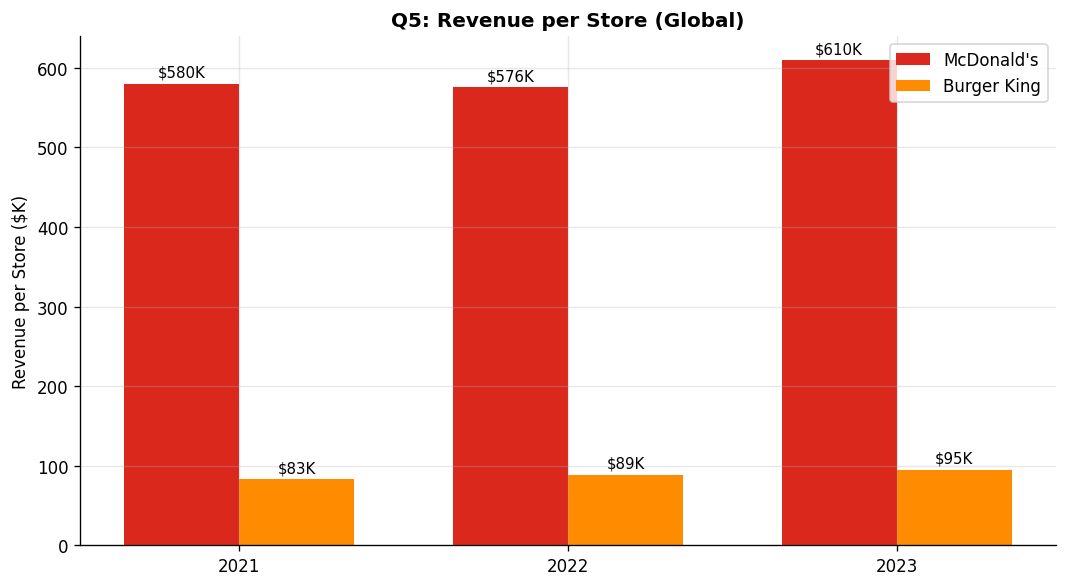

In [15]:
comp['mcd_rev_per_store_k'] = comp['mcd_total_revenue_m'] * 1000 / comp['mcd_stores_global']
comp['bk_rev_per_store_k']  = comp['bk_total_revenue_m']  * 1000 / comp['bk_stores_global']

fig, ax = plt.subplots(figsize=(9, 5))
x = np.arange(len(YEARS)); w = 0.35
b1 = ax.bar(x - w/2, comp['mcd_rev_per_store_k'], w, label="McDonald's", color=MCD_COLOR)
b2 = ax.bar(x + w/2, comp['bk_rev_per_store_k'],  w, label='Burger King', color=BK_COLOR)
ax.set_xticks(x); ax.set_xticklabels(YEARS)
ax.set_ylabel('Revenue per Store ($K)')
ax.set_title('Q5: Revenue per Store (Global)', fontweight='bold')
ax.legend()
for bar in b1: ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+5, f'${bar.get_height():,.0f}K', ha='center', va='bottom', fontsize=9)
for bar in b2: ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+5, f'${bar.get_height():,.0f}K', ha='center', va='bottom', fontsize=9)
plt.tight_layout(); plt.show()

### Q6. How does franchise revenue compare, and what percentage of total revenue does it represent?
**Rationale:** Franchise dependency indicates business model risk — high franchise revenue is generally lower-risk and more scalable.

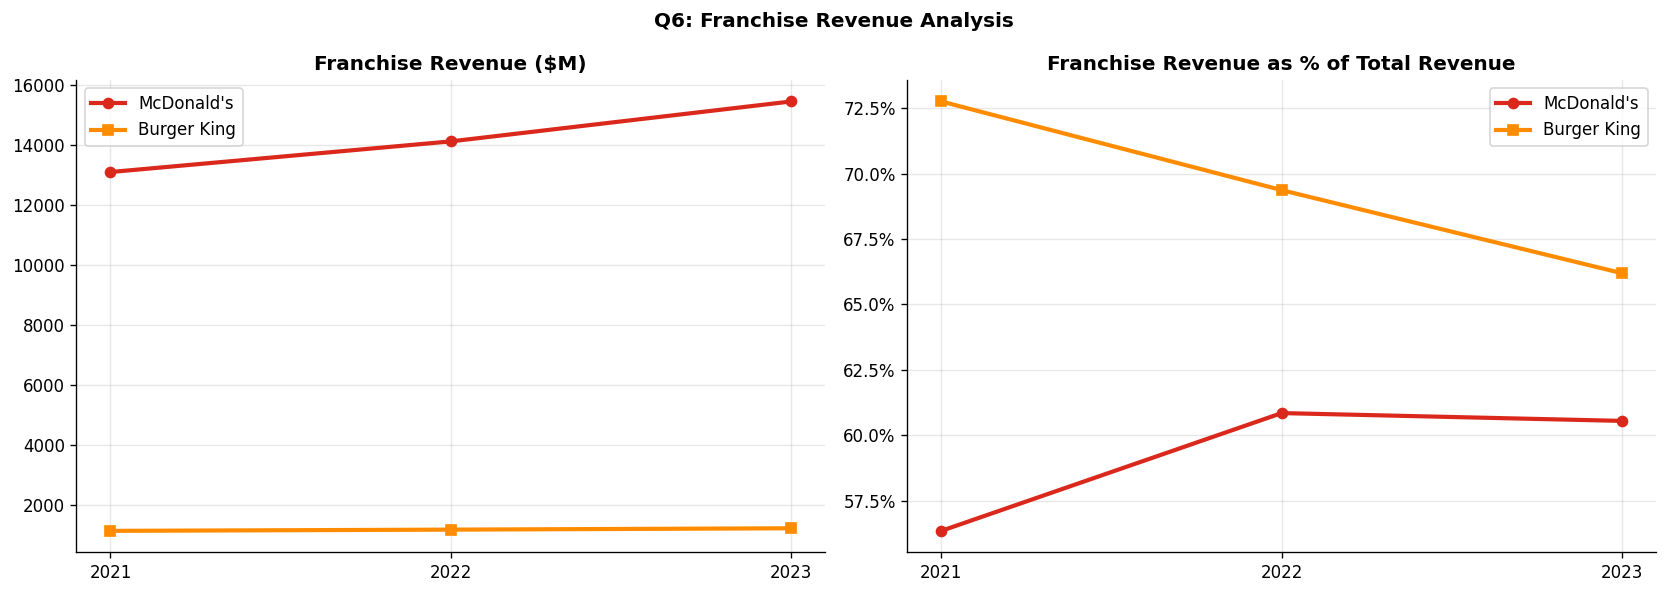

 year  mcd_franchise_revenue_m  bk_franchise_revenue_m  mcd_franchise_%  bk_franchise_%
 2021                  13085.0                  1130.0        56.342577       72.762395
 2022                  14106.0                  1171.0        60.846310       69.372038
 2023                  15436.0                  1216.0        60.547580       66.194883


In [16]:
comp['mcd_franchise_%'] = comp['mcd_franchise_revenue_m'] / comp['mcd_total_revenue_m'] * 100
comp['bk_franchise_%']  = comp['bk_franchise_revenue_m']  / comp['bk_total_revenue_m']  * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(YEARS, comp['mcd_franchise_revenue_m'], marker='o', color=MCD_COLOR, linewidth=2.5, label="McDonald's")
axes[0].plot(YEARS, comp['bk_franchise_revenue_m'],  marker='s', color=BK_COLOR,  linewidth=2.5, label='Burger King')
axes[0].set_title('Franchise Revenue ($M)', fontweight='bold')
axes[0].set_xticks(YEARS); axes[0].legend()

axes[1].plot(YEARS, comp['mcd_franchise_%'], marker='o', color=MCD_COLOR, linewidth=2.5, label="McDonald's")
axes[1].plot(YEARS, comp['bk_franchise_%'],  marker='s', color=BK_COLOR,  linewidth=2.5, label='Burger King')
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].set_title('Franchise Revenue as % of Total Revenue', fontweight='bold')
axes[1].set_xticks(YEARS); axes[1].legend()

plt.suptitle('Q6: Franchise Revenue Analysis', fontweight='bold')
plt.tight_layout(); plt.show()

print(comp[['year','mcd_franchise_revenue_m','bk_franchise_revenue_m','mcd_franchise_%','bk_franchise_%']].to_string(index=False))

### Q7. How have US store counts trended, and is either company contracting in the US?
**Rationale:** US is the home market for both companies. A declining US store count may signal market saturation or strategic retreat.

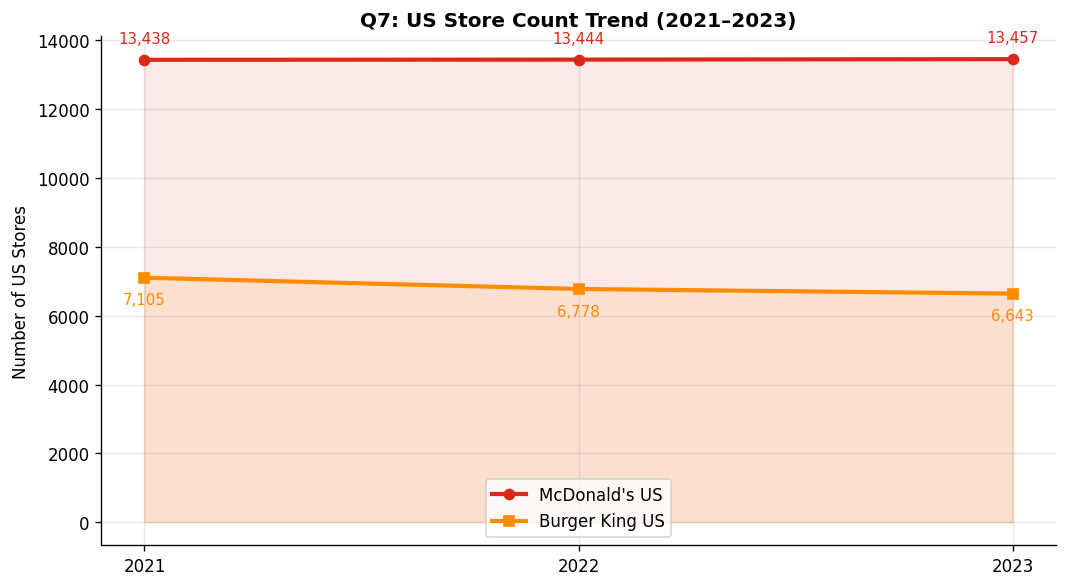

McDonald's US stores change (2021→2023): +19
Burger King US stores change (2021→2023): -462


In [17]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(YEARS, comp['mcd_stores_us'], marker='o', color=MCD_COLOR, linewidth=2.5, label="McDonald's US")
ax.plot(YEARS, comp['bk_stores_us'],  marker='s', color=BK_COLOR,  linewidth=2.5, label='Burger King US')
ax.fill_between(YEARS, comp['mcd_stores_us'], alpha=0.1, color=MCD_COLOR)
ax.fill_between(YEARS, comp['bk_stores_us'],  alpha=0.1, color=BK_COLOR)
for yr, mv, bv in zip(YEARS, comp['mcd_stores_us'], comp['bk_stores_us']):
    ax.annotate(f'{int(mv):,}', (yr, mv), textcoords='offset points', xytext=(0, 10), ha='center', color=MCD_COLOR, fontsize=9)
    ax.annotate(f'{int(bv):,}', (yr, bv), textcoords='offset points', xytext=(0, -16), ha='center', color=BK_COLOR, fontsize=9)
ax.set_ylabel('Number of US Stores')
ax.set_title('Q7: US Store Count Trend (2021–2023)', fontweight='bold')
ax.set_xticks(YEARS); ax.legend(); plt.tight_layout(); plt.show()

bk_us_change = comp['bk_stores_us'].iloc[-1] - comp['bk_stores_us'].iloc[0]
mcd_us_change = comp['mcd_stores_us'].iloc[-1] - comp['mcd_stores_us'].iloc[0]
print(f"McDonald's US stores change (2021→2023): {mcd_us_change:+.0f}")
print(f"Burger King US stores change (2021→2023): {bk_us_change:+.0f}")

### Q8. What is Burger King's system-wide sales growth trend and how does it compare to McDonald's total revenue growth?
**Rationale:** System-wide sales include franchisee sales not captured in reported revenue, making it the truest measure of brand performance.

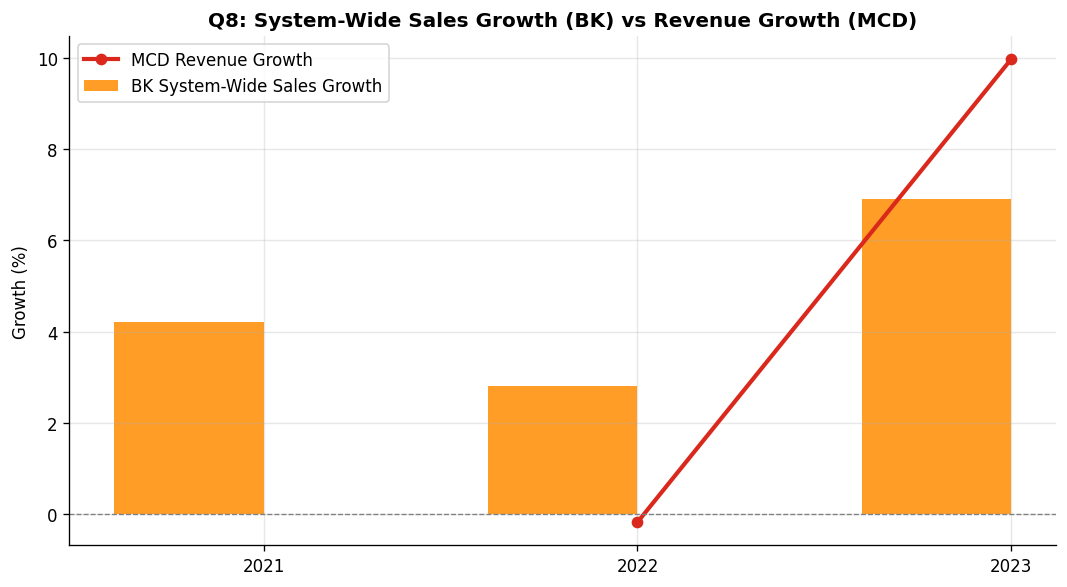

BK System-Wide Sales Growth:
 year  value
 2021    4.2
 2022    2.8
 2023    6.9


In [18]:
bk_sws_growth = bk[bk['item'] == 'system_wide_sales_growth_percent'].sort_values('year')
bk_sws_growth = bk_sws_growth[bk_sws_growth['year'].isin(YEARS)]

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar([yr - 0.2 for yr in bk_sws_growth['year']], bk_sws_growth['value'], 0.4, label='BK System-Wide Sales Growth', color=BK_COLOR, alpha=0.85)
ax.plot(YEARS[1:], comp['mcd_rev_growth_%'].dropna(), marker='o', color=MCD_COLOR, linewidth=2.5, label="MCD Revenue Growth")
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.set_xticks(YEARS); ax.set_ylabel('Growth (%)')
ax.set_title('Q8: System-Wide Sales Growth (BK) vs Revenue Growth (MCD)', fontweight='bold')
ax.legend(); plt.tight_layout(); plt.show()

print('BK System-Wide Sales Growth:')
print(bk_sws_growth[['year','value']].to_string(index=False))

### Q9. How does McDonald's net income trend, and what is the net profit margin?
**Rationale:** Net income and net margin show the bottom-line outcome after all costs, taxes, and interest.

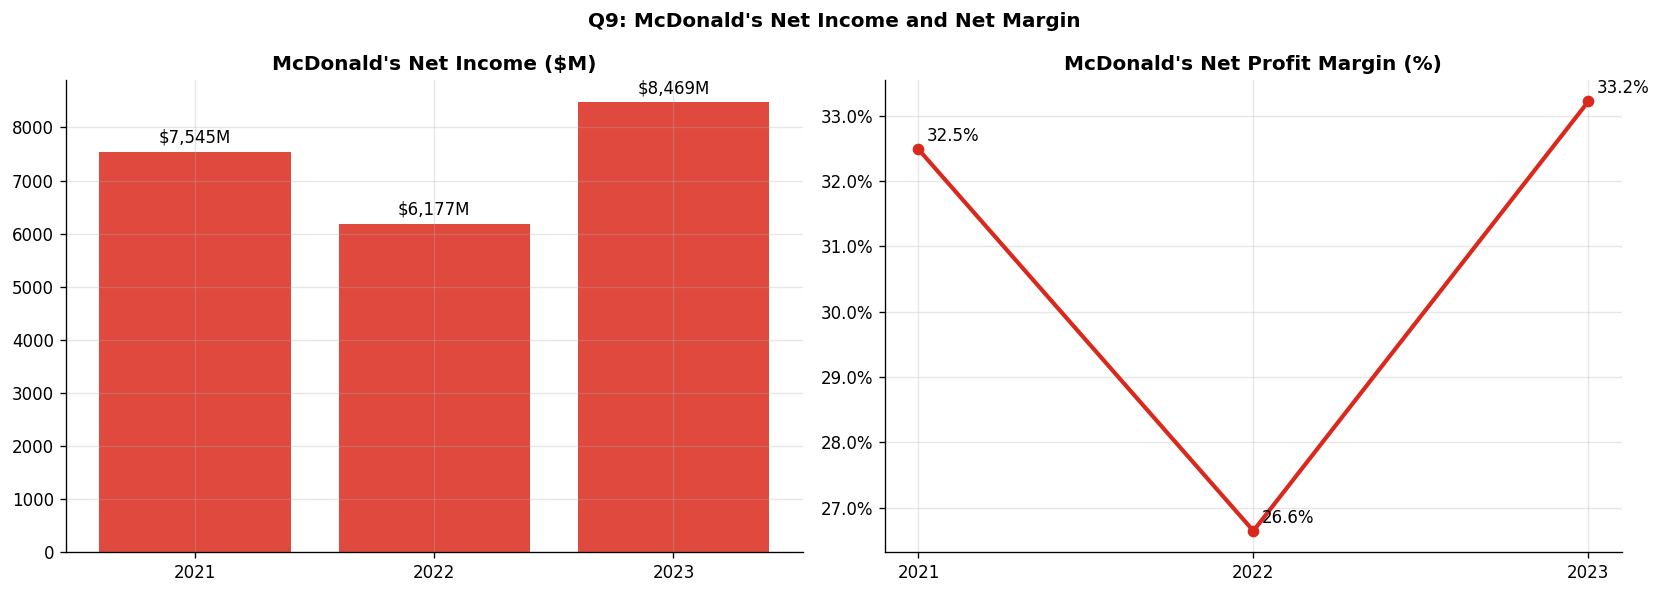

In [19]:
comp['mcd_net_margin_%'] = comp['mcd_net_income_m'] / comp['mcd_total_revenue_m'] * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(YEARS, comp['mcd_net_income_m'], color=MCD_COLOR, alpha=0.85)
for yr, val in zip(YEARS, comp['mcd_net_income_m']):
    axes[0].text(yr, val + 100, f'${val:,.0f}M', ha='center', va='bottom', fontsize=10)
axes[0].set_title("McDonald's Net Income ($M)", fontweight='bold')
axes[0].set_xticks(YEARS)

axes[1].plot(YEARS, comp['mcd_net_margin_%'], marker='o', color=MCD_COLOR, linewidth=2.5)
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].set_title("McDonald's Net Profit Margin (%)", fontweight='bold')
axes[1].set_xticks(YEARS)
for yr, val in zip(YEARS, comp['mcd_net_margin_%']):
    axes[1].annotate(f'{val:.1f}%', (yr, val), textcoords='offset points', xytext=(5, 5), fontsize=10)

plt.suptitle('Q9: McDonald\'s Net Income and Net Margin', fontweight='bold')
plt.tight_layout(); plt.show()

### Q10. How has McDonald's company-operated restaurant expense structure evolved (food, payroll, occupancy)?
**Rationale:** Understanding which cost components are rising helps identify operational risk and efficiency opportunities.

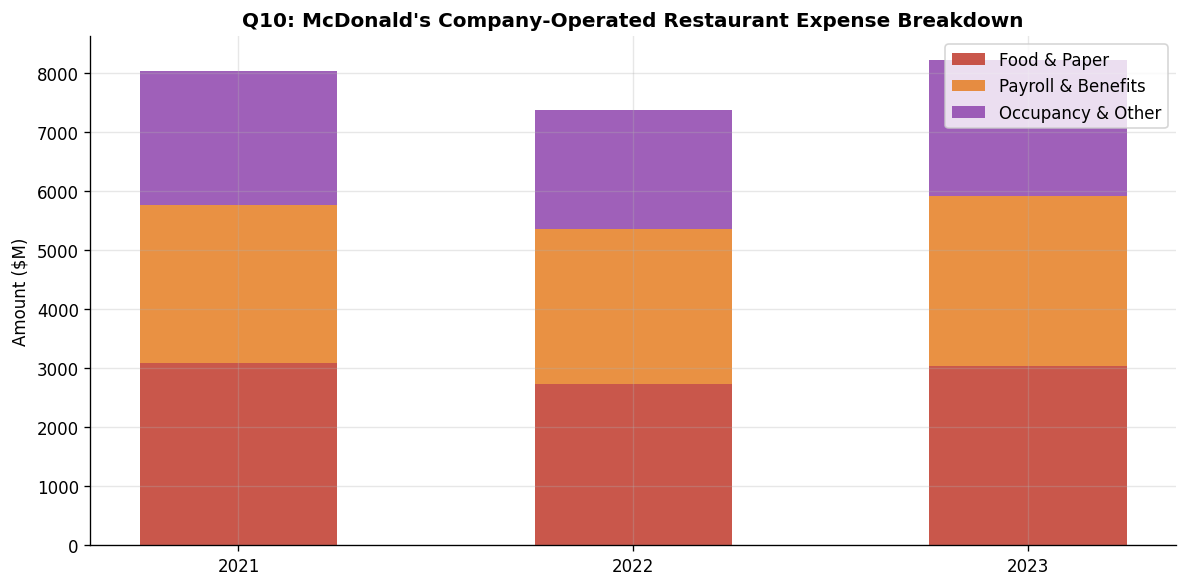

      Food & Paper  Payroll & Benefits  Occupancy & Other
2021        3096.8              2677.2             2273.8
2022        2737.3              2617.4             2026.2
2023        3039.0              2885.8             2299.3


In [20]:
expense_items = {
    'Food & Paper':        'food_paper',
    'Payroll & Benefits':  'payroll_employee_benefits',
    'Occupancy & Other':   'occupancy_other_operating_expenses',
}

expense_data = {}
for label, item in expense_items.items():
    expense_data[label] = [mcd_val(item, yr) for yr in YEARS]

exp_df = pd.DataFrame(expense_data, index=YEARS)

fig, ax = plt.subplots(figsize=(10, 5))
bottom = np.zeros(len(YEARS))
clrs = ['#c0392b', '#e67e22', '#8e44ad']
for (label, vals), clr in zip(expense_data.items(), clrs):
    ax.bar(YEARS, vals, bottom=bottom, label=label, color=clr, alpha=0.85, width=0.5)
    bottom += np.array(vals)
ax.set_xticks(YEARS)
ax.set_ylabel('Amount ($M)')
ax.set_title("Q10: McDonald's Company-Operated Restaurant Expense Breakdown", fontweight='bold')
ax.legend(); plt.tight_layout(); plt.show()

print(exp_df.to_string())

### Q11. What is the comparable sales growth trend for Burger King?
**Rationale:** Comparable (same-store) sales growth strips out the effect of new openings and closures — it's the purest measure of demand momentum.

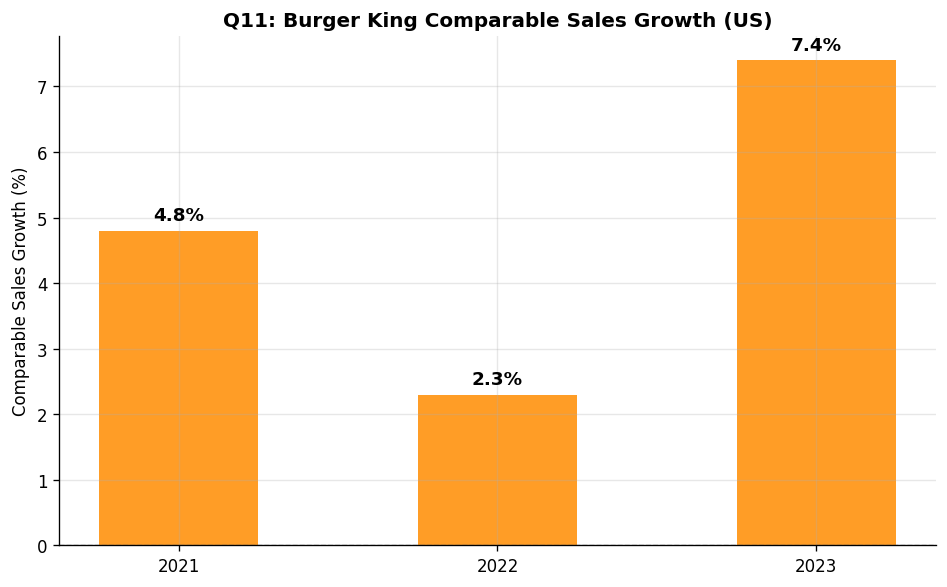

In [21]:
bk_comp_sales = bk[bk['item'] == 'comparable_sales_growth_global'].sort_values('year')
bk_comp_sales = bk_comp_sales[bk_comp_sales['year'].isin(YEARS)]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(bk_comp_sales['year'], bk_comp_sales['value'], color=BK_COLOR, alpha=0.85, width=0.5)
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
for bar, val in zip(bars, bk_comp_sales['value']):
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height() + 0.1, f'{val}%', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.set_ylabel('Comparable Sales Growth (%)')
ax.set_title('Q11: Burger King Comparable Sales Growth (US)', fontweight='bold')
ax.set_xticks(YEARS); plt.tight_layout(); plt.show()

### Q12. How does McDonald's Earnings Per Share (EPS) trend, and what does dividend growth look like?
**Rationale:** EPS and dividend growth are key signals for investor returns and capital allocation discipline.

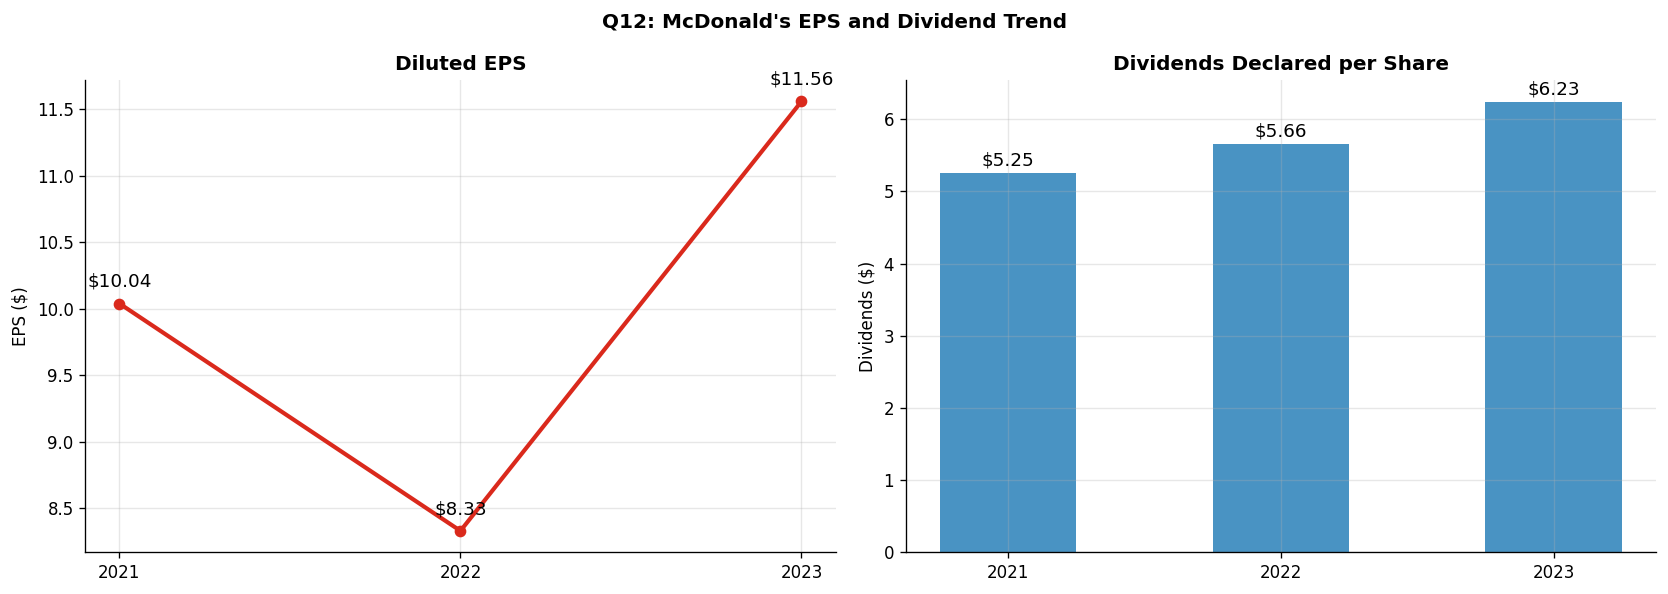

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# EPS
axes[0].plot(YEARS, comp['mcd_eps_diluted'], marker='o', color=MCD_COLOR, linewidth=2.5)
for yr, val in zip(YEARS, comp['mcd_eps_diluted']):
    axes[0].annotate(f'${val:.2f}', (yr, val), textcoords='offset points', xytext=(0, 10), ha='center', fontsize=11)
axes[0].set_title("Diluted EPS", fontweight='bold')
axes[0].set_xticks(YEARS); axes[0].set_ylabel('EPS ($)')

# Dividends
axes[1].bar(YEARS, comp['mcd_dividends_per_share'], color='#2980b9', alpha=0.85, width=0.5)
for yr, val in zip(YEARS, comp['mcd_dividends_per_share']):
    axes[1].text(yr, val + 0.05, f'${val:.2f}', ha='center', va='bottom', fontsize=11)
axes[1].set_title("Dividends Declared per Share", fontweight='bold')
axes[1].set_xticks(YEARS); axes[1].set_ylabel('Dividends ($)')

plt.suptitle("Q12: McDonald's EPS and Dividend Trend", fontweight='bold')
plt.tight_layout(); plt.show()

### Q13. How does capital expenditure (CapEx) compare between the two companies?
**Rationale:** CapEx reveals investment commitment — higher spend signals confidence in growth; lower spend may indicate a more asset-light strategy.

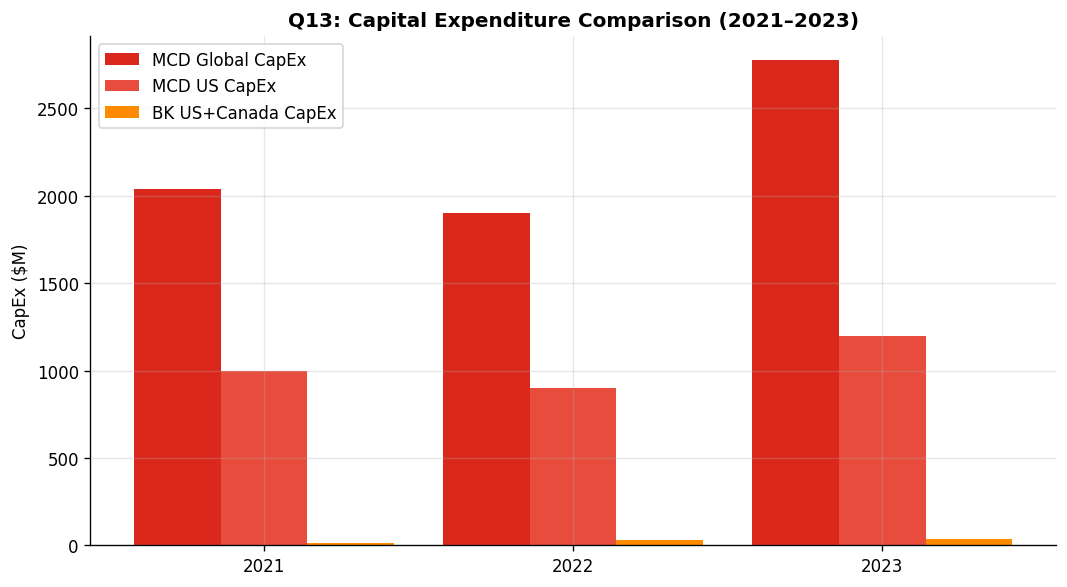

MCD Global CapEx: [np.float64(2040.0), np.float64(1899.0), np.float64(2775.0)]
MCD US CapEx:     [np.float64(1000.0), np.float64(900.0), np.float64(1200.0)]
BK US+Canada CapEx: [np.float64(13.0), np.float64(31.0), np.float64(37.0)]


In [23]:
mcd_capex_global = [mcd[(mcd['table_name']=='capital_expenditures') & (mcd['item']=='global') & (mcd['year']==yr)]['value'].values[0] for yr in YEARS]
mcd_capex_us     = [mcd[(mcd['table_name']=='capital_expenditures') & (mcd['item']=='us') & (mcd['year']==yr)]['value'].values[0] for yr in YEARS]
bk_capex_usc     = [bk_val('capex_us_canada', yr) for yr in YEARS]

fig, ax = plt.subplots(figsize=(9, 5))
x = np.arange(len(YEARS)); w = 0.28
ax.bar(x - w, mcd_capex_global, w, label="MCD Global CapEx", color=MCD_COLOR)
ax.bar(x,     mcd_capex_us,     w, label="MCD US CapEx",     color='#e74c3c')
ax.bar(x + w, bk_capex_usc,     w, label="BK US+Canada CapEx", color=BK_COLOR)
ax.set_xticks(x); ax.set_xticklabels(YEARS)
ax.set_ylabel('CapEx ($M)')
ax.set_title('Q13: Capital Expenditure Comparison (2021–2023)', fontweight='bold')
ax.legend(); plt.tight_layout(); plt.show()

print('MCD Global CapEx:', mcd_capex_global)
print('MCD US CapEx:    ', mcd_capex_us)
print('BK US+Canada CapEx:', bk_capex_usc)

### Q14. What is McDonald's long-term debt trend and interest expense burden?
**Rationale:** Debt load and interest expense affect financial flexibility. High leverage can be a red flag if earnings decline.

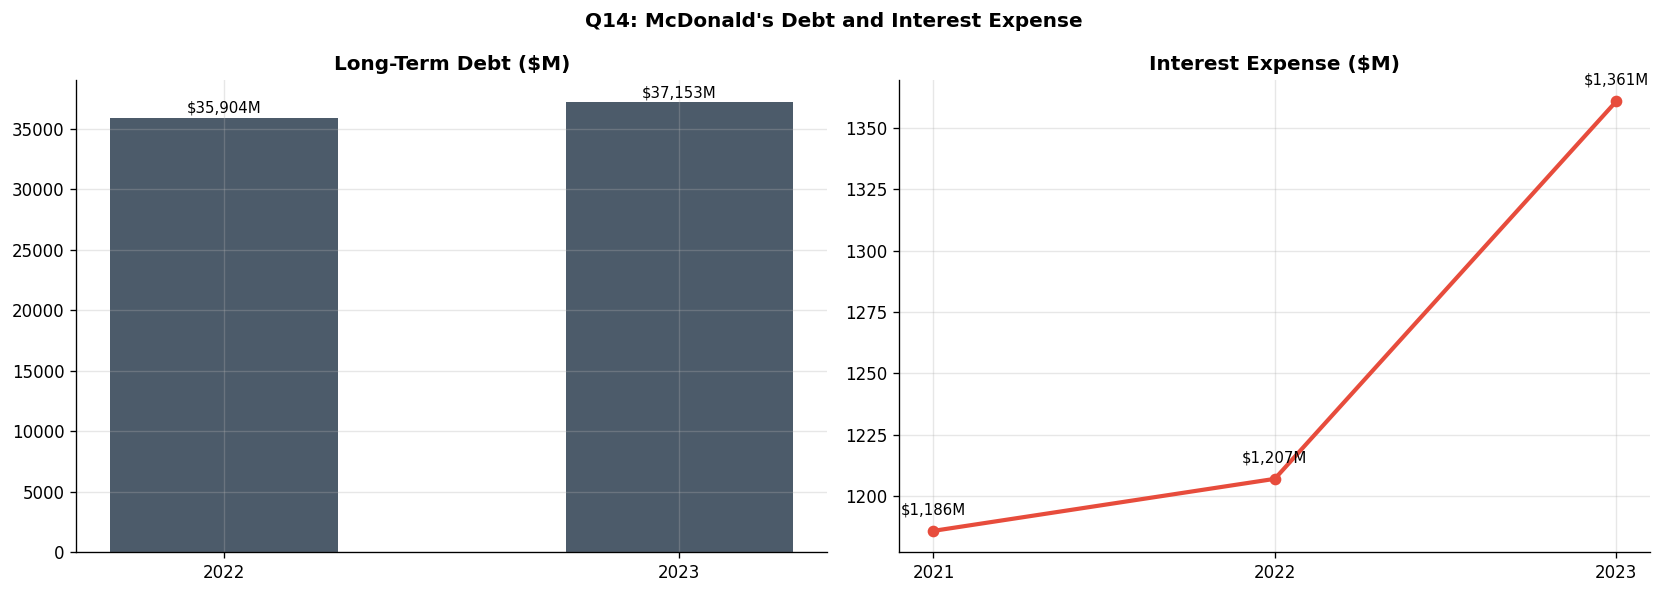

In [24]:
mcd_lt_debt = mcd[(mcd['table_name']=='liabilities') & (mcd['item']=='long_term_debt')].sort_values('year')
mcd_lt_debt = mcd_lt_debt[mcd_lt_debt['year'].isin(YEARS)]

mcd_interest = mcd[(mcd['table_name']=='income_statement') & (mcd['item']=='interest_expense')].sort_values('year')
mcd_interest = mcd_interest[mcd_interest['year'].isin(YEARS)]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(mcd_lt_debt['year'], mcd_lt_debt['value'], color='#2c3e50', alpha=0.85, width=0.5)
for yr, val in zip(mcd_lt_debt['year'], mcd_lt_debt['value']):
    axes[0].text(yr, val + 200, f'${val:,.0f}M', ha='center', va='bottom', fontsize=9)
axes[0].set_title("Long-Term Debt ($M)", fontweight='bold')
axes[0].set_xticks(mcd_lt_debt['year'].tolist())

axes[1].plot(mcd_interest['year'], mcd_interest['value'], marker='o', color='#e74c3c', linewidth=2.5)
for yr, val in zip(mcd_interest['year'], mcd_interest['value']):
    axes[1].annotate(f'${val:,.0f}M', (yr, val), textcoords='offset points', xytext=(0, 10), ha='center', fontsize=9)
axes[1].set_title("Interest Expense ($M)", fontweight='bold')
axes[1].set_xticks(mcd_interest['year'].tolist())

plt.suptitle("Q14: McDonald's Debt and Interest Expense", fontweight='bold')
plt.tight_layout(); plt.show()

### Q15. Revenue Mix Analysis – How does Burger King's advertising & property revenue contribute alongside franchise revenue?
**Rationale:** Diversified revenue streams reduce dependence on franchise fees. BK's advertising fund revenue reflects brand investment and the strength of its marketing ecosystem.

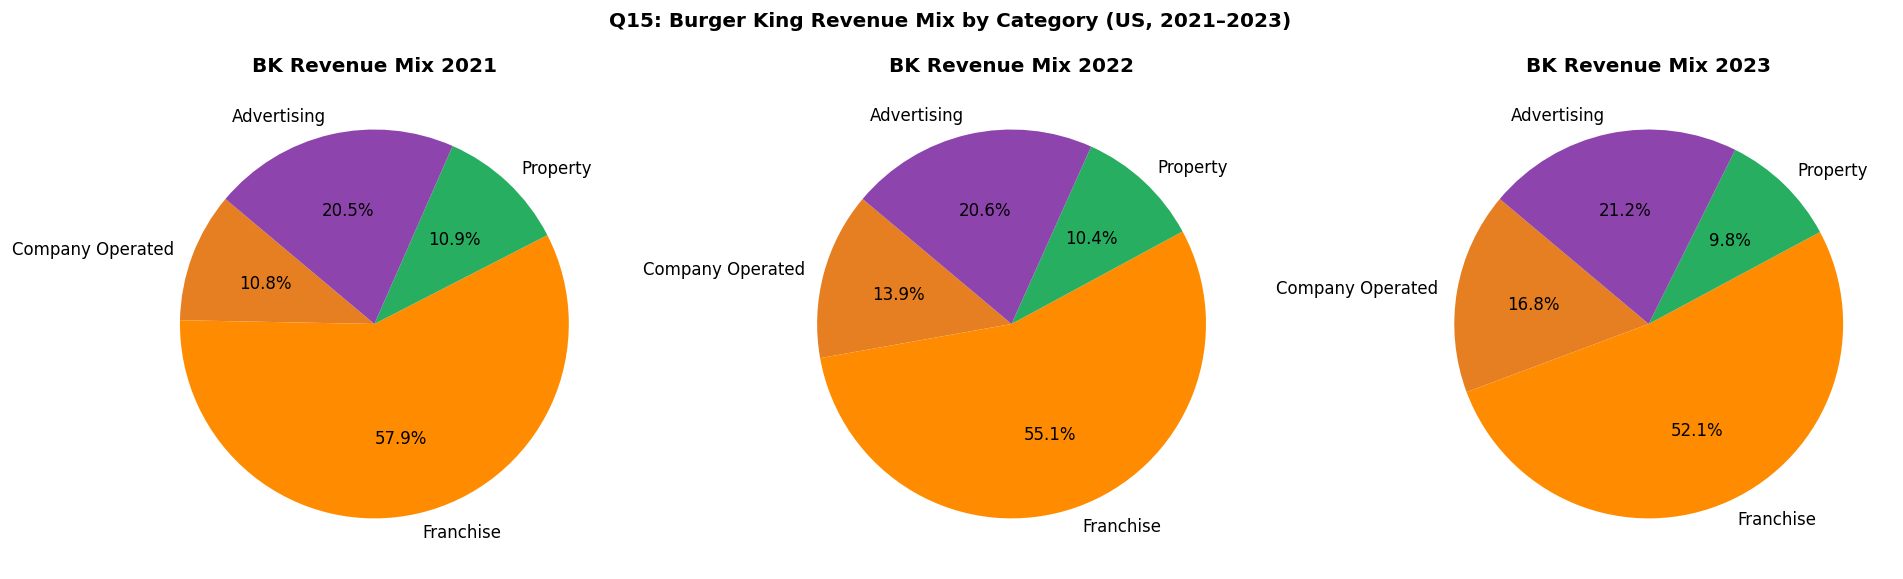

BK Revenue Mix ($M):
      Company Operated  Franchise  Property  Advertising
2021             211.0     1130.0     212.0        400.0
2022             296.0     1171.0     221.0        438.0
2023             392.0     1216.0     229.0        495.0


In [25]:
bk_rev_items = ['revenue_company_operated', 'revenue_franchise', 'revenue_property', 'revenue_advertising']
bk_rev_labels = ['Company Operated', 'Franchise', 'Property', 'Advertising']
bk_rev_colors = ['#e67e22', BK_COLOR, '#27ae60', '#8e44ad']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for ax, yr in zip(axes, YEARS):
    vals = [bk_val(item, yr) for item in bk_rev_items]
    vals = [v if not np.isnan(v) else 0 for v in vals]
    wedges, texts, autotexts = ax.pie(vals, labels=bk_rev_labels, colors=bk_rev_colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'BK Revenue Mix {yr}', fontweight='bold')

plt.suptitle('Q15: Burger King Revenue Mix by Category (US, 2021–2023)', fontweight='bold')
plt.tight_layout(); plt.show()

print('BK Revenue Mix ($M):')
mix_df = pd.DataFrame({lbl: [bk_val(item, yr) for yr in YEARS] for lbl, item in zip(bk_rev_labels, bk_rev_items)}, index=YEARS)
print(mix_df.to_string())

---
## 8. Export Cleaned Datasets for Dashboarding (Part 2)

We export three clean CSV files:
1. `mcd_clean.csv` — cleaned McDonald's long-form data
2. `bk_clean.csv` — cleaned Burger King long-form data
3. `comparison_master.csv` — unified side-by-side comparison table

In [26]:
# Save cleaned CSVs
mcd.to_csv('mcd_clean.csv', index=False)
bk.to_csv('bk_clean.csv',   index=False)
comp.to_csv('comparison_master.csv', index=False)

print('Exported:')
print(f'  mcd_clean.csv        → {len(mcd)} rows')
print(f'  bk_clean.csv         → {len(bk)} rows')
print(f'  comparison_master.csv → {len(comp)} rows')
print('\nComparison Master Table:')
display(comp.T)

Exported:
  mcd_clean.csv        → 207 rows
  bk_clean.csv         → 57 rows
  comparison_master.csv → 3 rows

Comparison Master Table:


,0,1,2
year,2021.000000,2022.000000,2023.000000
mcd_total_revenue_m,23224.000000,23183.000000,25494.000000
bk_total_revenue_m,1553.000000,1688.000000,1837.000000
mcd_system_wide_sales_m,23224.000000,23183.000000,25494.000000
bk_system_wide_sales_m,21690.000000,23450.000000,27019.000000
mcd_operating_income_m,10356.000000,9371.000000,11647.000000
bk_operating_income_m,932.000000,921.000000,983.000000
mcd_net_income_m,7544.700000,6177.400000,8468.800000
mcd_stores_global,40031.000000,40275.000000,41822.000000
bk_stores_global,18625.000000,19035.000000,19384.000000


---
## 9. Summary of Key Findings

| # | Question | Key Insight |
|---|----------|-------------|
| Q1 | Revenue Scale | McDonald's is ~14x larger by reported revenue than Burger King |
| Q2 | Revenue Growth | Both companies recovered post-2021; MCD grew ~10% in 2022→2023 |
| Q3 | Operating Margin | MCD maintains ~45%+ operating margin; BK ~53% on smaller base |
| Q4 | Global Stores | MCD has 41,822 stores vs BK's 19,384 — more than double the footprint |
| Q5 | Revenue/Store | MCD generates significantly more revenue per store than BK |
| Q6 | Franchise Revenue | MCD earns ~60% of revenue from franchises; BK ~66% (US) |
| Q7 | US Store Count | BK's US footprint is shrinking (7,105 → 6,643); MCD stable |
| Q8 | System-Wide Sales | BK's SWS grew 6.9% in 2023 — a positive demand recovery signal |
| Q9 | Net Income | MCD net income surged to $8.5B in 2023 with a ~33% net margin |
| Q10 | Cost Breakdown | MCD's payroll and food costs are the largest and rising cost categories |
| Q11 | Same-Store Sales | BK comp sales grew 7.4% in 2023 — best performance in 3 years |
| Q12 | EPS & Dividends | MCD's EPS rose from $10.04 → $11.56; consistent dividend growth |
| Q13 | CapEx | MCD invested $2.8B globally in 2023 (up sharply); BK invested $37M in US+CA |
| Q14 | Debt Burden | MCD carries ~$37B long-term debt but strong earnings provide coverage |
| Q15 | BK Revenue Mix | Advertising fund revenue (27%) is BK's second-largest US revenue source |

---
*Cleaned datasets exported as `mcd_clean.csv`, `bk_clean.csv`, and `comparison_master.csv` for use in Part 2 dashboarding.*